In [1]:
%matplotlib inline
import pylab as pl

In [2]:
from astroquery.vizier import Vizier
import pyavm
import PIL
import PIL.Image
import numpy as np
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u

# An2011 Vizier

(copied over from SEDS.ipynb)

In [3]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [4]:
# This image shows only H-alpha stars
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickSpitzer_RGB_I421.png')
img_spitzer = np.array(PIL.Image.open(f'{basepath}/images/BrickSpitzer_RGB_I421.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_spitzer = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
an2011 = Vizier(row_limit=500).get_catalogs(['J/ApJ/736/133/table1'])[0]

In [6]:
an2011crds = SkyCoord(an2011['RAJ2000'], an2011['DEJ2000'], frame='fk5', unit=(u.h, u.deg))

In [7]:
an2011[wwi_spitzer.footprint_contains(an2011crds)]

SSTGC,Y,RAJ2000,DEJ2000,Date,Us,F02,S06,Y09,f_Y09,YSOcat
,,,,'Y:M:D',,,,,,
int32,str1,str11,str11,str10,str5,str3,str3,str3,str1,int16
600274,,17 46 07.39,-28 45 32.0,2008-05-01,no,,,,,0
618018,Y,17 46 13.81,-28 43 44.5,2008-05-01,maybe,yes,,,,1


Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


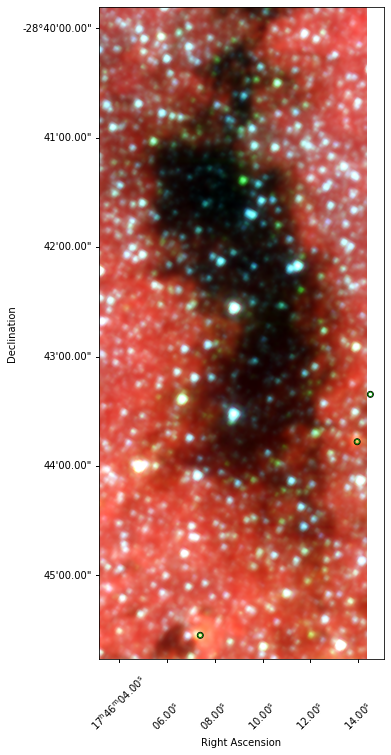

In [8]:
# This image shows only H-alpha stars
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickSpitzer_RGB_I421.png')
img_spitzer = np.array(PIL.Image.open(f'{basepath}/images/BrickSpitzer_RGB_I421.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_spitzer = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_spitzer = img_spitzer.swapaxes(0,1)
wwi_spitzer = wwi_spitzer.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_spitzer)
ax.imshow(img_spitzer)
axlims = ax.axis()

xx,yy = wwi_spitzer.world_to_pixel(an2011crds[wwi_spitzer.footprint_contains(an2011crds)])
ax.scatter(
    xx,yy,
    #spitzer_crds.ra[spitzer['_4.5mag'] - spitzer['_8.0mag'] < 0],
    #spitzer_crds.dec[spitzer['_4.5mag'] - spitzer['_8.0mag'] < 0],
    #transform=ax.get_transform('fk5'),
    marker='o', edgecolors='black', facecolors='none',
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), a 
);
ax.scatter(
    xx,yy,
    s=20,
    marker='o', edgecolors='g', facecolors='none',
);
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('hh:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
lon.set_ticks(spacing=30. * u.arcsec)
lon.set_ticklabel(rotation=45, pad=60)
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')



#ax.axis(axlims)

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')
#fig.savefig(f"{basepath}/images/BlueStarsWithSpitzerMatches_on_RGB.png", bbox_inches='tight')

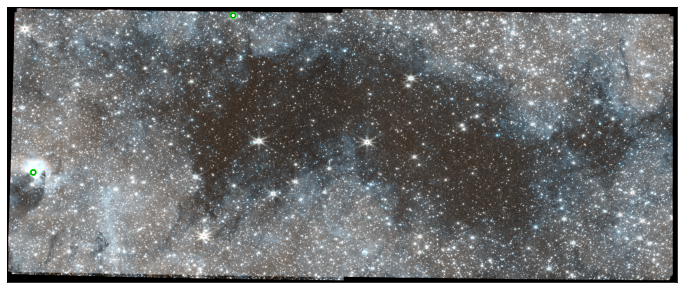

In [9]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_withstars.png')
img_jwlong = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_withstars.png'))#[::-1,:,:]
wwi_jwlong = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_jwlong = img_jwlong
wwi_jwlong = wwi_jwlong.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_jwlong)
ax.imshow(img_jwlong, origin='lower')
axlims = ax.axis()

xx,yy = wwi_jwlong.world_to_pixel(an2011crds[wwi_jwlong.footprint_contains(an2011crds)])
ax.scatter(
    xx,yy,
    #transform=ax.get_transform('fk5'),
    marker='o', edgecolors='lime', facecolors='none',
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), a 
);
ax.scatter(
    xx,yy,
    s=20,
    marker='o', edgecolors='g', facecolors='none',
);
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('hh:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
lon.set_ticks(spacing=30. * u.arcsec)
lon.set_ticklabel(rotation=45, pad=60)

ax.set_ylim(ax.get_ylim()[::-1])

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')

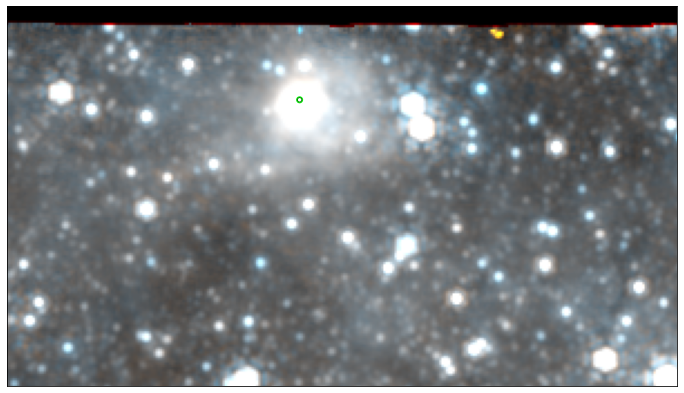

In [28]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_withstars.png')
img_jwlong = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_withstars.png'))#[::-1,:,:]
wwi_jwlong = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_jwlong = img_jwlong
wwi_jwlong = wwi_jwlong.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_jwlong)
ax.imshow(img_jwlong, origin='lower')
axlims = ax.axis()

xx,yy = wwi_jwlong.world_to_pixel(an2011crds[wwi_jwlong.footprint_contains(an2011crds)])
ax.scatter(
    xx,yy,
    #transform=ax.get_transform('fk5'),
    marker='o', edgecolors='lime', facecolors='none',
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), a 
);
ax.scatter(
    xx,yy,
    s=20,
    marker='o', edgecolors='g', facecolors='none',
);
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('hh:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
lon.set_ticks(spacing=30. * u.arcsec)
lon.set_ticklabel(rotation=45, pad=60)

ax.set_ylim(ax.get_ylim()[::-1])

ax.axis([1800, 2100, 200, 30])

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')

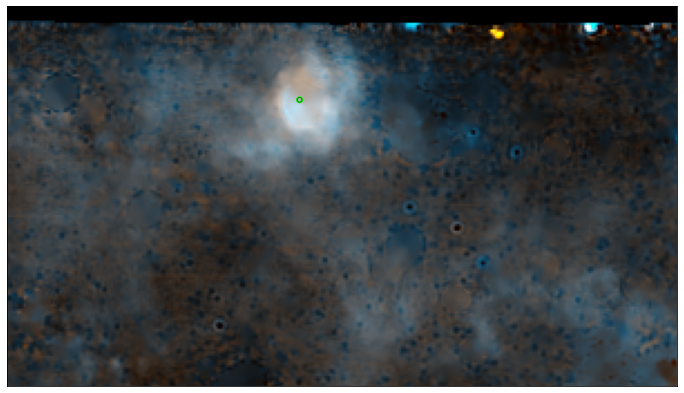

In [29]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_lighter.png')
img_jwlong = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_lighter.png'))#[::-1,:,:]
wwi_jwlong = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_jwlong = img_jwlong
wwi_jwlong = wwi_jwlong.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_jwlong)
ax.imshow(img_jwlong, origin='lower')
axlims = ax.axis()

xx,yy = wwi_jwlong.world_to_pixel(an2011crds[wwi_jwlong.footprint_contains(an2011crds)])
ax.scatter(
    xx,yy,
    #transform=ax.get_transform('fk5'),
    marker='o', edgecolors='lime', facecolors='none',
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), a 
);
ax.scatter(
    xx,yy,
    s=20,
    marker='o', edgecolors='g', facecolors='none',
);
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('hh:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
lon.set_ticks(spacing=30. * u.arcsec)
lon.set_ticklabel(rotation=45, pad=60)

ax.set_ylim(ax.get_ylim()[::-1])

ax.axis([1800, 2100, 200, 30])

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')

In [66]:
from astropy import coordinates, visualization
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

In [67]:
%run visualization_support.py

<Figure size 432x288 with 0 Axes>

In [72]:
import regions

In [125]:
zoomboxes = regions.Regions.parse('''fk5
box(17:46:07.6563,-28:45:28.805,21.594",24.326",90)
box(17:46:13.7991,-28:43:42.370,7.700",8.052",90)
box(17:46:04.1471,-28:42:32.955,5.781",5.553",90)''', format='ds9')
zoompolys = regions.Regions([
    zb.to_pixel(ww).to_polygon().to_sky(ww)
    for zb in zoomboxes])
# br,  tr,  tl, bl
zoompolys

<Regions([<PolygonSkyRegion(vertices=<SkyCoord (ICRS): (ra, dec) in deg
    [(266.52803925, -28.76100587), (266.52803947, -28.75500753),
     (266.53574717, -28.75500753), (266.53574739, -28.76100587)]>)>, <PolygonSkyRegion(vertices=<SkyCoord (ICRS): (ra, dec) in deg
    [(266.556213  , -28.72951092), (266.55621302, -28.72737203),
     (266.55876363, -28.72737203), (266.55876365, -28.72951092)]>)>, <PolygonSkyRegion(vertices=<SkyCoord (ICRS): (ra, dec) in deg
    [(266.5163923 , -28.70996244), (266.51639231, -28.70835661),
     (266.518151  , -28.70835661), (266.51815101, -28.70996244)]>)>])>

In [126]:
br, tr, tl, bl = zoompolys[0].vertices
xl, yl = map(int, ww.world_to_pixel(bl))
xr, yr = map(int, ww.world_to_pixel(tr))
xl, yl, xr, yr

(1165, 101, 1551, 444)

(2350, 5725, 3)
(582, 1420, 3)


'datfix' made the change 'Set DATE-BEG to '2022-08-28T02:38:56.308' from MJD-BEG.
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'.
'obsfix' made the change 'Set OBSGEO-L to   -51.514501 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'.


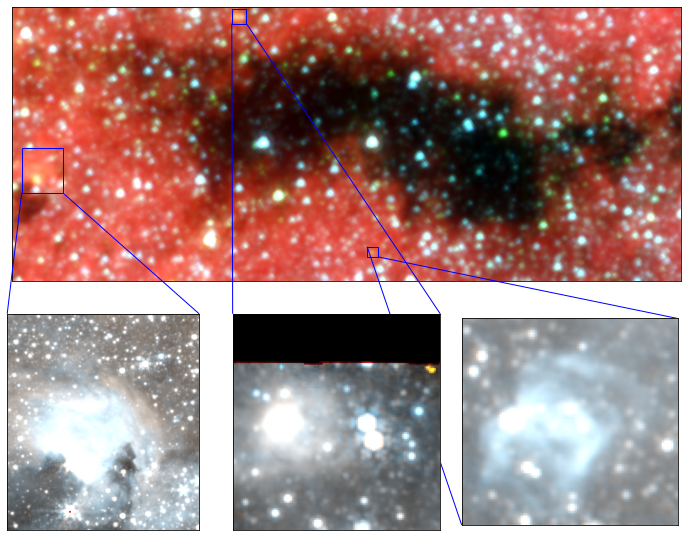

In [127]:
tick_fontsize = 14
fontsize = 16
radesys = 'fk5'

avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_withstars.png')
rgb_scaled = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_withstars.png'))#[::-1,:,:]
print(rgb_scaled.shape)
ww = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

# fig = pl.figure(figsize=(12,12))
# ax = fig.add_subplot(projection=ww)
# im = ax.imshow(rgb_scaled)

avmspitz = pyavm.AVM.from_image(f'{basepath}/images/BrickSpitzer_RGB_I421.png')
rgb_spitzer_scaled = rgb_spitzer = np.array(PIL.Image.open(f'{basepath}/images/BrickSpitzer_RGB_I421.png'))[::-1,:,:]
print(rgb_spitzer.shape)
wwspitz = wcs.WCS(fits.Header.fromstring(avmspitz.Spatial.FITSheader))

fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(projection=wwspitz)
im = ax.imshow(rgb_spitzer_scaled, origin='lower')

distance = 8.5*u.kpc
scalebar_length = 0.1*u.pc
scalebar_loc=(0.14,0.15) # y, x
left_side = coordinates.SkyCoord(*wwspitz.celestial.wcs_pix2world(scalebar_loc[1]*rgb_spitzer_scaled.shape[1],
                                                                  scalebar_loc[0]*rgb_spitzer_scaled.shape[0], 0)*u.deg,
                                 frame=radesys.lower())

length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
#make_scalebar(ax, left_side, length, color='k', linestyle='-', label=f'{scalebar_length:0.1f}',
#              text_offset=0.5*u.arcsec, fontsize=fontsize)

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel("")#f"?? RA ({radesys})", fontsize=fontsize)
dec.set_axislabel("")#f"?? Dec ({radesys})", fontsize=fontsize, minpad=0.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)
#dec.set_ticks(number=0)
#ra.set_ticks(number=0)
dec.set_ticks_visible(False)
dec.set_ticklabel_visible(False)
ra.set_ticks_visible(False)
ra.set_ticklabel_visible(False)



axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.1, 0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
#xl,xr = 50,400
#yl,yr = 750,1100
#(yl,yr), (xl, xr) = box_to_corners(zoompolys[0], ww)
#print(xl,yl,xr,yr)
#bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
#tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
br, tr, tl, bl = zoompolys[0].vertices
yl, xl = map(int, ww.world_to_pixel(bl))
yr, xr = map(int, ww.world_to_pixel(tr))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :][::-1,:,:], extent=[xl,xr,yl,yr], origin='lower')
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+90, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)




axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.37,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
#xl,xr = 3000,3100
#yl,yr = 200,300
#(yl,yr), (xl, xr) = box_to_corners(zoompolys[1], ww)
#bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
#tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
br, tr, tl, bl = zoompolys[1].vertices
yl, xl = map(int, ww.world_to_pixel(bl))
yr, xr = map(int, ww.world_to_pixel(tr))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :][::-1,:,:], extent=[xl,xr,yl,yr], origin='lower')
mark_inset_otherdata(axins, ax, bl, tr, 1, 2,)
hide_ticks(axins)
axins.set_zorder(50)

# scalebar_length = 5000*u.au
# length = (scalebar_length / distance).to(u.arcsec, u.dimensionless_angles())
# left_side = coordinates.SkyCoord(*ww.wcs_pix2world(xl+50, yl+20, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
# make_scalebar(axins, left_side, length, color='w', linestyle='-', label=f'{scalebar_length:0.1f}',
#               text_offset=0.1*u.arcsec, fontsize=fontsize)

axins = inset_axes(ax,
                   loc=3, width=3, height=3,
                   axes_class=visualization.wcsaxes.core.WCSAxes,
                    bbox_to_anchor=(0.64,0.05,1,1),
                    bbox_transform=fig.transFigure,                    
                   axes_kwargs=dict(wcs=ww))
#xl,xr = 3150,3350
#yl,yr = 1500,1700
#(yl,yr), (xl, xr) = box_to_corners(zoompolys[2], ww)
#bl = coordinates.SkyCoord(*ww.wcs_pix2world(xl, yl, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
#tr = coordinates.SkyCoord(*ww.wcs_pix2world(xr, yr, 0), frame=ww.wcs.radesys.lower(), unit=(u.deg,u.deg))
br, tr, tl, bl = zoompolys[2].vertices
yl, xl = map(int, ww.world_to_pixel(bl))
yr, xr = map(int, ww.world_to_pixel(tr))
axins.imshow(rgb_scaled[yl:yr, xl:xr, :][::-1,:,:], extent=[xl,xr,yl,yr], origin='lower')
_, _, p1, p2, pp = mark_inset_otherdata(axins, ax, bl, tr, 1, 3,)
p1.set_zorder(-10)
p2.set_zorder(-10)
hide_ticks(axins)

pl.savefig('/orange/adamginsburg/jwst/brick/images/Spitzer_InsetZooms_3.png', dpi=300, bbox_inches='tight')

In [12]:
an2011[wwi_jwlong.footprint_contains(an2011crds)]

SSTGC,Y,RAJ2000,DEJ2000,Date,Us,F02,S06,Y09,f_Y09,YSOcat
,,,,'Y:M:D',,,,,,
int32,str1,str11,str11,str10,str5,str3,str3,str3,str1,int16
600274,,17 46 07.39,-28 45 32.0,2008-05-01,no,,,,,0
618018,Y,17 46 13.81,-28 43 44.5,2008-05-01,maybe,yes,,,,1


In [13]:
from astroquery.ipac.irsa import sha
from astroquery.ipac.irsa import Irsa

/blue/adamginsburg/adamginsburg/repos/astroquery/astroquery/ipac/irsa/sha/__init__.py:14: UserWarning: Experimental: SHA has not yet been refactored to have its API match the rest of astroquery.
  warnings.warn("Experimental: SHA has not yet been refactored to have its "


In [14]:
an2011crds[wwi_jwlong.footprint_contains(an2011crds)]

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    [(266.53079167, -28.75888889), (266.55754167, -28.72902778)]>

In [15]:
an2011crds[wwi_jwlong.footprint_contains(an2011crds)][0]

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (266.53079167, -28.75888889)>

In [16]:
an2011crds[wwi_jwlong.footprint_contains(an2011crds)][0].galactic

<SkyCoord (Galactic): (l, b) in deg
    (0.20872704, -0.00178789)>

In [17]:
{k:v for k,v in Irsa.list_catalogs().items() if 'irs' in v.lower()}

{'pt_src_cat1': '2MASS First Incremental Release Point Source Catalog (PSC)',
 'ext_src_cat1': '2MASS First Incremental Release Extended Source Catalog (XSC)',
 'scan_dat': '2MASS First Incremental Release Survey Scan Info',
 'irs_enhv211': 'IRS Enhanced Products',
 'goodsnirs16': 'GOODS-N IRS 16 micron Photometry Catalog',
 'goodssirs16': 'GOODS-S IRS 16 micron Photometry Catalog',
 'urat1': 'The First USNO Robotic Astrometric Telescope Catalog (URAT1)',
 'irts_nirspsc': 'IRTS NIRS Point Source Catalogue'}

In [18]:
Irsa.query_region(an2011crds[wwi_jwlong.footprint_contains(an2011crds)][0],
                  radius=10*u.arcsec,
                  catalog='irs_enhv211',
                 )

reqkey,tn,object,ra,dec,clon,clat,cra,cdec,irac8,irac8u,iras12,iras12u,irs16,irs16u,irs22,irs22u,mips24,mips24u,iras25,iras25u,mips24_irac8,mips24_irs16,irs16_irac8,iras25_iras12,ra_sl,dec_sl,pa_sl,ra_ll,dec_ll,pa_ll,date_obs,campname,bandpass,oflag,ratio_sl2_sl1,ratio_sl1_ll2,ratio_ll2_ll1,ra_rqst,dec_rqst,ra_del,dec_del,width_sl2,width_sl1,width_ll2,width_ll1,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,ra1_sl,dec1_sl,ra2_sl,dec2_sl,ra3_sl,dec3_sl,ra4_sl,dec4_sl,ra1_ll,dec1_ll,ra2_ll,dec2_ll,ra3_ll,dec3_ll,ra4_ll,dec4_ll,heritagefilename,xtable,enhid,campid,obsrvr,progid,wave_min,wave_max,filetype,filedesc,instmode,equinox,dist,angle
,,,deg,deg,,,,,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,deg,deg,deg,deg,deg,deg,,,,,,,,deg,deg,deg,deg,arcsec,arcsec,arcsec,arcsec,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,,,,micron,micron,,,,,arcsec,deg
int32,int32,object,float64,float64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,int32,int32,object,int32,float64,float64,object,object,object,int32,float64,float64
23974656,3,GC_B_bright,266.53082,-28.75880,17h46m07.40s,-28d45m31.68s,17h46m07.39s,-28d45m31.7s,0.496,0.008,1.106,0.020,4.457,0.073,16.980,0.274,19.360,0.351,20.010,0.342,39.0087,4.3437,8.9805,18.0922,266.53082,-28.75880,176.86908,266.53094,-28.75888,93.12907,2008-05-07 14:07:48,IRSX010300,IRS Merged 5.217-37.86um,15,0.718,0.521,0.878,266.53079,-28.75889,0.00001,0.00009,4.73,4.56,10.00,12.26,266.53006,-28.75645,266.53125,-28.75639,266.53156,-28.76114,266.53037,-28.76120,266.53006,-28.75645,266.53125,-28.75639,266.53156,-28.76114,266.53037,-28.76120,266.52270,-28.75997,266.52289,-28.75700,266.53918,-28.75778,266.53900,-28.76075,/sha/archive/proc/IRSX010300/r23974656/enhanced/SPITZER_S5_23974656_03_merge.tbl,"<a href=""/data/SPITZER/Enhanced/IRS/spectra/IRSX010300/r23974656/enhanced/SPITZER_S5_23974656_03_merge.tbl"">Table spectrum</a><br />",13525,1422,"Ramirez, Solange",40230,5.21725,37.86356,Table,IRS Merged Spectrum,Irs Stare,2000,0.337549,22.840105


pos_t1 = sha.query(coord=an2011crds[wwi_jwlong.footprint_contains(an2011crds)][0], size=10*u.arcsec)

In [19]:
import pyspeckit

In [20]:
import glob
from astropy import table
sws_spec0 = [table.Table.read(tb, format='ascii.ipac') for tb in glob.glob("../spitzer/r23974656/ch0/*/*.tbl")]
sws_spec2 = [table.Table.read(tb, format='ascii.ipac') for tb in glob.glob("../spitzer/r23974656/ch2/*/*.tbl")]

In [21]:
sp0 = pyspeckit.Spectra([pyspeckit.Spectrum(xarr=tb['wavelength']*u.um,
                                            data=tb['flux_density'].quantity,
                                            error=np.where(np.isnan(tb['error']), np.inf*u.Jy, tb['error'].quantity))
                         for tb in sws_spec0])

INFO: Creating spectra [pyspeckit.spectrum.classes]
INFO: Concatenating data [pyspeckit.spectrum.classes]


In [22]:
sp2 = pyspeckit.Spectra([pyspeckit.Spectrum(xarr=tb['wavelength']*u.um,
                                            data=tb['flux_density'].quantity,
                                            error=np.where(np.isnan(tb['error']), np.inf*u.Jy, tb['error'].quantity))
                         for tb in sws_spec2])

INFO: Creating spectra [pyspeckit.spectrum.classes]
INFO: Concatenating data [pyspeckit.spectrum.classes]


Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround


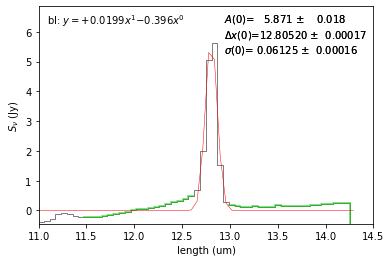

In [32]:
# NeII
sp0[-1].plotter(xmin=11, xmax=14.5)
sp0[-1].baseline(include=[12, 12.4, 13, 14], highlight_fitregion=True )
sp0[-1].specfit(guesses=[7,12.8,0.01])
sp0[-1].baseline(excludefit=True, xmin=11.5, xmax=14.5, highlight_fitregion=True )
sp0[-1].specfit(guesses=[7,12.8,0.01])

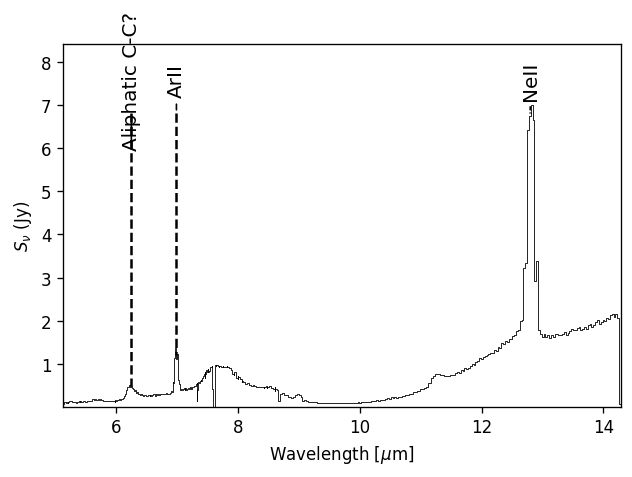

In [46]:
sp0.plotter(figure=pl.figure(facecolor='w', dpi=120))
sp0.plotter.line_ids(['ArII', 'NeII', 'Aliphatic C-C?'], [6.99, 12.8, 6.25]*u.um)
pl.xlabel('Wavelength [$\mu$m]');

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround


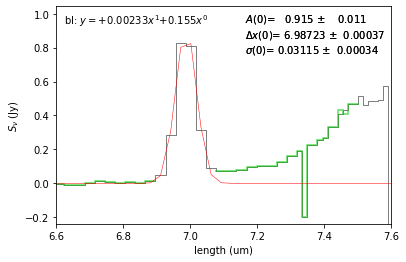

In [34]:
# 6.98 um ArII
sp0[0].plotter(xmin=6.6, xmax=7.6)
sp0[0].baseline()
sp0[0].specfit(guesses=[1,7,0.01])
sp0[0].baseline(excludefit=True, xmin=6.6, xmax=7.5, highlight_fitregion=True )
sp0[0].specfit(guesses=[1,7,0.01])

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround


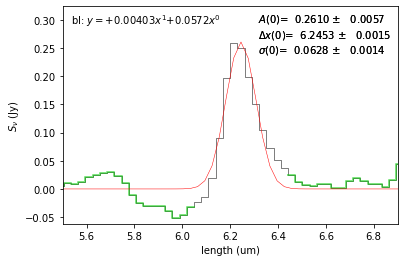

In [35]:
# 6.25 micron...
sp0[0].plotter(xmin=5.5, xmax=6.9)
sp0[0].baseline()
sp0[0].specfit(guesses=[1,6.3,0.01])
sp0[0].baseline(excludefit=True, xmin=5.5, xmax=6.9, highlight_fitregion=True )
sp0[0].specfit(guesses=[1,6.3,0.01])
sp0[0].baseline(excludefit=True, xmin=5.5, xmax=6.9, highlight_fitregion=True )
sp0[0].specfit(guesses=[1,6.3,0.01])

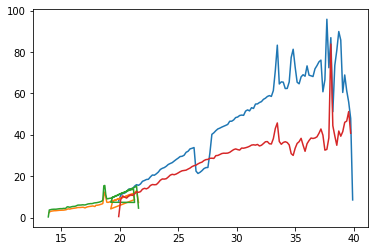

In [36]:
for sp in sws_spec2:
    pl.plot(sp['wavelength'], sp['flux_density'])

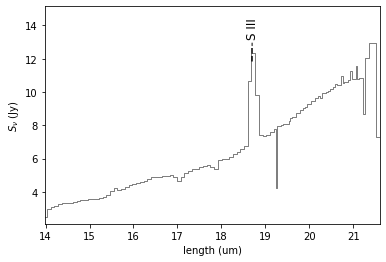

In [37]:
sp2[1].plotter()
sp2[1].plotter.line_ids(['S III'], [18.7]*u.um)